<a href="https://colab.research.google.com/github/Satomiko/20Newsgroups/blob/main/20Newsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #for multinomialNB
from sklearn.metrics import accuracy_score, classification_report #for evaluation report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#after the review of text preprocessing method in "2. preprocessing methods.ipybb", the following function was created for text preprocessing

def preprocess_text(df, column_name):
    # Lowercasing
    df[column_name] = df[column_name].apply(lambda tokens: [token.lower() for token in tokens])

    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if word not in stop_words])

    # Removing one-letter words
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if len(word) > 1])

    # Remove special symbols and punctuation
    df[column_name] = df[column_name].apply(lambda tokens: [word for word in tokens if word.isalpha()])

    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    df[column_name] = df[column_name].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [208]:
#creating function to count word a colomun

def word_count (df,colomun_name):
  df['word_count'] = df [colomun_name].apply(len)
  average_word_count = df['word_count'].mean()
  max_word_count = df['word_count'].max()
  minimum_word_count = df['word_count'].min()
  print(f"Average Word Count :{average_word_count}")
  print(f"Maximum Word Count :{max_word_count}")
  print(f"Minimum Word Count :{minimum_word_count}")

In [221]:
#use "fetch_20newsgroups" function from sklean.datasets  to load 20 newsgroups dataset
# removing "headers", "footers" and "quotes" is recommended because it is more realistic (https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)
# loading dataset with or without "headers", "footers" and "quotes" and review each datasets.

remove = ("headers", "footers", "quotes")
news20group_train = fetch_20newsgroups(subset='train', remove = remove)
news20group_test = fetch_20newsgroups (subset='test', remove= remove)

In [222]:
#print list of 20 news groups
categories = news20group_train.target_names
categories

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [223]:
#number of observation in train data
len(news20group_train.data)

11314

In [224]:
#number of observation in test data
len(news20group_test.data)

7532

In [225]:
#count observation in each category (Train Data)

cat,frequency_train = np.unique(news20group_train.target, return_counts = True)
cat,frequency_train

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

In [226]:
#count observation in each category (Test Data)

cat,frequency_test = np.unique(news20group_test.target, return_counts = True)
cat,frequency_test

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([319, 389, 394, 392, 385, 395, 390, 396, 398, 397, 399, 396, 393,
        396, 394, 398, 364, 376, 310, 251]))

In [227]:
cat =  np.array (news20group_test.target_names)

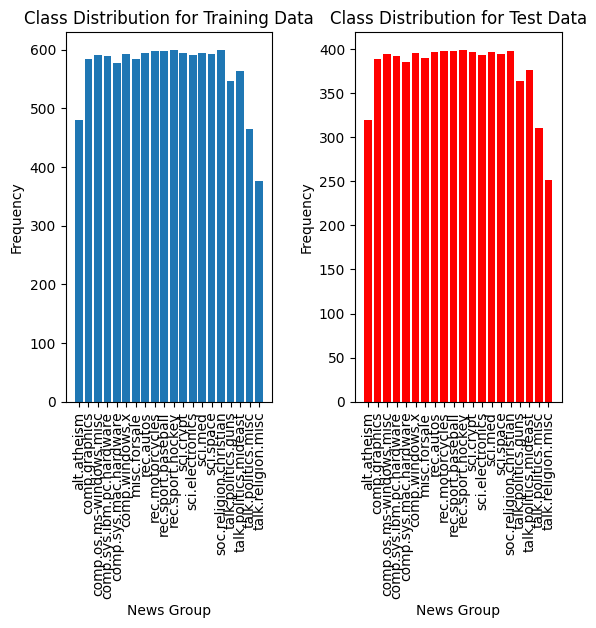

In [228]:
#create bar plots for both training data and test data to compare the distribution

#subplot 1 for training data distribution
plt.subplot(1,2,1) #1 row, 2 columns, position 1
plt.bar(cat, frequency_train)
plt.xticks(rotation=90)
plt.title('Class Distribution for Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

#subplot 2 for test data distribution
plt.subplot(1,2,2) #1 row, 2 columns, position 2
plt.bar(cat, frequency_test, color = 'red')
plt.xticks(rotation=90)
plt.title('Class Distribution for Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4) #increase horisontal space
plt.show()

In [229]:
#Convert Bunch format to dataframe
train_df = pd.DataFrame({'data': news20group_train.data, 'target': news20group_train.target})
test_df = pd.DataFrame({'data': news20group_test.data, 'target': news20group_test.target})


In [230]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7532 entries, 0 to 7531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    7532 non-null   object
 1   target  7532 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.8+ KB


In [231]:
train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [232]:
#Tokenization
train_df ['data'] = train_df ['data'] .apply(word_tokenize)
test_df['data']= test_df ['data']. apply(word_tokenize)

In [233]:
#Word count for each document is added in the data.
print('[Train]')
word_count(train_df,'data')
print("[Test]")
word_count(test_df,'data')


[Train]
Average Word Count :270.4452890224501
Maximum Word Count :35955
Minimum Word Count :0
[Test]
Average Word Count :226.5367764206054
Maximum Word Count :78849
Minimum Word Count :0


In [ ]:
#.info()shows there are no observation with empty data attribute, however the minimum word count shows zero.
#It indicates that there are empty or whitespace strings in the "data"column that are not bery useful for the analysis.

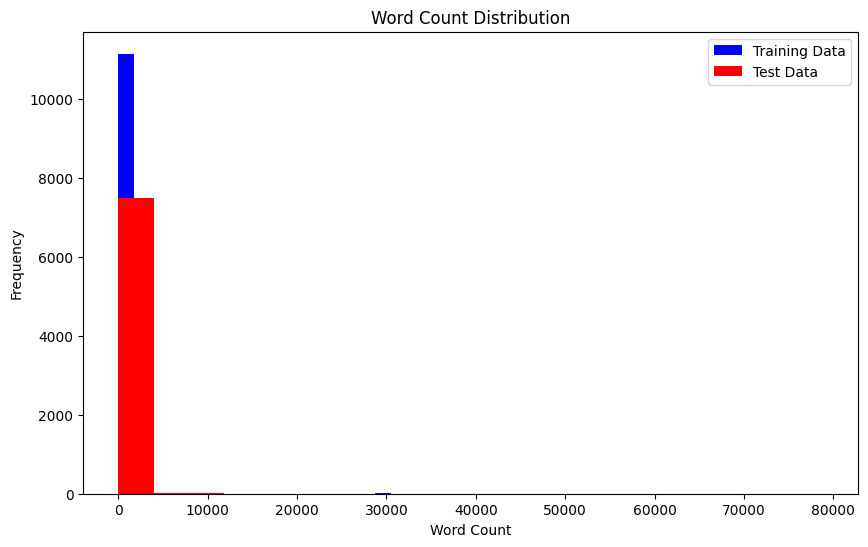

In [234]:
#word count distribution
# Create a histogram of word counts
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.hist(train_df['word_count'], bins=20, color='blue', label='Training Data')
plt.hist(test_df['word_count'], bins=20, color='red', label='Test Data')

# Set labels for x and y axes
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Set the title of the histogram
plt.title("Word Count Distribution")

# Add a legend
plt.legend(loc='upper right')

# Show the histogram
plt.show()

In [235]:
preprocess_text(train_df, 'data')
preprocess_text(test_df,'data')

In [236]:
# Remove rows with empty or whitespace strings in the "data" column
train_df = train_df[train_df['data'].apply(len) > 0]
test_df = test_df[test_df['data'].apply(len) > 0]

In [237]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10993 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        10993 non-null  object
 1   target      10993 non-null  int64 
 2   word_count  10993 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 343.5+ KB


In [238]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7296 entries, 0 to 7531
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   data        7296 non-null   object
 1   target      7296 non-null   int64 
 2   word_count  7296 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ KB


In [239]:
print('[Train]')
word_count(train_df,'data')
print("[Test]")
word_count(test_df,'data')

[Train]
Average Word Count :93.85927408350769
Maximum Word Count :6216
Minimum Word Count :1
[Test]
Average Word Count :88.28673245614036
Maximum Word Count :5058
Minimum Word Count :1


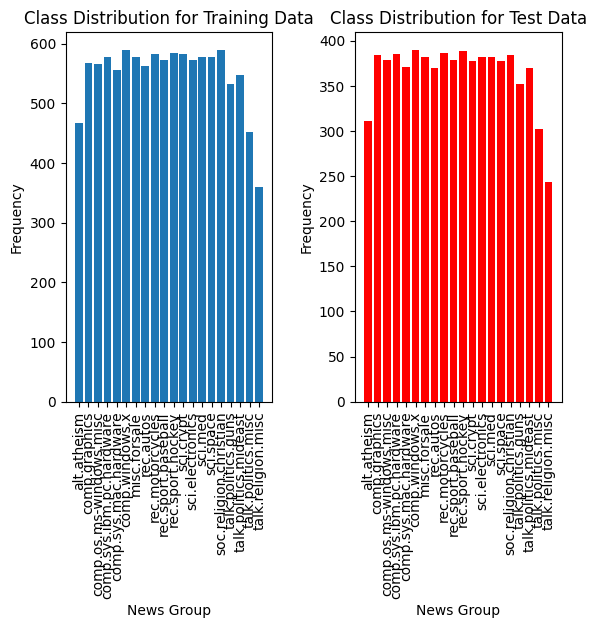

In [240]:
#create bar plots for both training data and test data to compare the distribution
frequency_train = train_df['target'].value_counts().sort_index()
frequency_test = test_df['target'].value_counts().sort_index()

category_label = [categories [i] for i in frequency_train.index]

#subplot 1 for training data distribution
plt.subplot(1,2,1) #1 row, 2 columns, position 1
plt.bar(category_label, frequency_train.values)
plt.xticks(rotation=90)
plt.title('Class Distribution for Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

#subplot 2 for test data distribution
plt.subplot(1,2,2) #1 row, 2 columns, position 2
plt.bar(category_label, frequency_test.values, color = 'red')
plt.xticks(rotation=90)
plt.title('Class Distribution for Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.4) #increase horisontal space
plt.show()

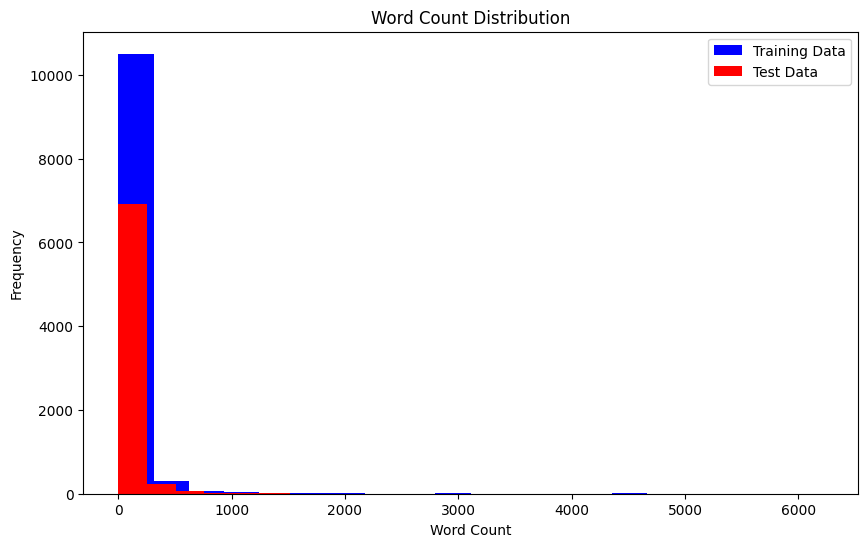

In [241]:
#word count distribution
# Create a histogram of word counts
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.hist(train_df['word_count'], bins=20, color='blue', label='Training Data')
plt.hist(test_df['word_count'], bins=20, color='red', label='Test Data')

# Set labels for x and y axes
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Set the title of the histogram
plt.title("Word Count Distribution")

# Add a legend
plt.legend(loc='upper right')

# Show the histogram
plt.show()

In [242]:
test_df.head()

,data,target,word_count
0,"[little, confused, model, bonnevilles, heard, ...",7,41
1,"[familiar, format, thingies, seeing, folk, hea...",5,39
2,"[word, yes]",0,2
3,"[attacking, iraqi, drive, kuwait, country, who...",17,317
4,"[spent, two, solid, month, arguing, thing, obj...",19,10


In [ ]:
# #bag of word

# # Convert the tokenized words back to a space-separated string for each document (bag of word method expect a list, not a list of lists)
# train_df['data'] = train_df['data'].apply(lambda tokens: ' '.join(tokens))


# bow_vectorizer = CountVectorizer()
# bow_features = bow_vectorizer.fit_transform(train_df['data'])

In [243]:
# TF-IDF

train_df['data'] = train_df['data'].apply(lambda tokens: ' '.join(tokens))
test_df['data'] =test_df['data'].apply(lambda tokens:' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_df['data'])

X_test = tfidf_vectorizer.transform(test_df['data'])

In [244]:
feature_names = tfidf_vectorizer.get_feature_names_out()
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(X_train.toarray(), columns=feature_names)

In [245]:
tfidf_df.head()

,aa,aaa,ab,abc,ability,able,abort,abortion,abraham,absence,...,youth,yup,zd,zealand,zero,zionist,zone,zoom,zoroastrian,zv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
# Calculate the mean TF-IDF score for each attribute (word)
attribute_means = tfidf_df.mean()

# Sort the attributes by their mean TF-IDF scores in descending order
top_10_attributes = attribute_means.sort_values(ascending=False).head(10)

# Print the top 10 most common attributes
print("Top 10 Most Common Attributes:")
print(top_10_attributes)

Top 10 Most Common Attributes:
would     0.024074
one       0.021545
know      0.017512
like      0.017055
get       0.016664
think     0.014289
people    0.014243
could     0.013135
time      0.012801
anyone    0.012661
dtype: float64


In [247]:
# Create a dictionary to store the top 10 attributes by class
top_10_attributes_by_class = {}

# Iterate through each class
for class_label in set(train_df['target']):
    # Filter data for the current class
    class_data = train_df[train_df['target'] == class_label]['data']

    # Calculate the TF-IDF for the current class
    X_class = tfidf_vectorizer.transform(class_data)

    # Calculate the mean TF-IDF score for each attribute (word) in the class
    class_attribute_means = X_class.mean(axis=0)

    # Get the top 10 attributes for the current class
    top_10_attributes = [feature_names[i] for i in class_attribute_means.argsort()[0, ::-1][:10]]

    # Store the top 10 attributes in the dictionary
    top_10_attributes_by_class[class_label] = top_10_attributes

# Print the top 10 attributes for each class
for class_label, top_10_attributes in top_10_attributes_by_class.items():
    top_10_attributes = top_10_attributes[0]  # Extract the array from the DataFrame
    print(f"Top 10 Attributes for Class {class_label}:")
    for attribute in top_10_attributes:
        print(attribute)
    print()  # Add an empty line to separate classes

Top 10 Attributes for Class 0:
['god' 'one' 'people' ... 'locate' 'loading' 'aa']

Top 10 Attributes for Class 1:
['file' 'image' 'graphic' ... 'lately' 'zoroastrian' 'aa']

Top 10 Attributes for Class 2:
['window' 'file' 'driver' ... 'talent' 'ordinary' 'housing']

Top 10 Attributes for Class 3:
['drive' 'card' 'controller' ... 'london' 'login' 'aa']

Top 10 Attributes for Class 4:
['mac' 'apple' 'drive' ... 'mailer' 'magnitude' 'aa']

Top 10 Attributes for Class 5:
['window' 'server' 'widget' ... 'liked' 'lightning' 'aa']

Top 10 Attributes for Class 6:
['sale' 'offer' 'shipping' ... 'identify' 'identified' 'zv']

Top 10 Attributes for Class 7:
['car' 'would' 'engine' ... 'lefebvre' 'lebanon' 'aa']

Top 10 Attributes for Class 8:
['bike' 'motorcycle' 'dod' ... 'larry' 'landon' 'aa']

Top 10 Attributes for Class 9:
['game' 'team' 'year' ... 'manufacturing' 'manufacturer' 'laser']

Top 10 Attributes for Class 10:
['game' 'team' 'hockey' ... 'layer' 'launcher' 'aa']

Top 10 Attributes f

In [248]:
#for Multinomial NaiveBayes method, use "MultinomialNB" function fromsklearn.naive_bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, train_df['target'])

MultinomialNB()

In [249]:
# use "accuracy_score" and "classification_report" function from sklearn.metrics

predictions = nb_classifier.predict(X_test)
accuracy = accuracy_score(test_df['target'], predictions)

report = classification_report(test_df['target'], predictions, target_names=[categories [i] for i in frequency_test.index])
print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.6702302631578947
                          precision    recall  f1-score   support

             alt.atheism       0.60      0.30      0.40       311
           comp.graphics       0.57      0.64      0.60       384
 comp.os.ms-windows.misc       0.60      0.56      0.58       379
comp.sys.ibm.pc.hardware       0.56      0.68      0.62       385
   comp.sys.mac.hardware       0.67      0.61      0.64       371
          comp.windows.x       0.70      0.74      0.72       390
            misc.forsale       0.76      0.78      0.77       382
               rec.autos       0.75      0.71      0.73       370
         rec.motorcycles       0.74      0.74      0.74       386
      rec.sport.baseball       0.83      0.81      0.82       379
        rec.sport.hockey       0.87      0.92      0.89       389
               sci.crypt       0.71      0.75      0.73       378
         sci.electronics       0.63      0.51      0.56       382
                 sci.med       0.78      0.76 